<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>BESLISSINGSBOOM: TITANIC - kleine dataset</h1>    
    </font>
</div>

Er is heel wat geweten over de passagiers op de Titanic, zoals langs welk dek ze aan boord gingen, of ze in eerste, tweede of derde klasse reisden, of ze broers, zussen, een echtgenoot(ote), kinderen of ouders aan boord hadden, en of ze het ongeluk met de Titanic overleefden of niet.
De tabel geeft enkele van deze gegevens voor acht van hen. Stel op basis van deze tabel een beslissingsboom op die voorspelt wie overleeft en wie niet.

<table>
 <thead>
    <tr>
      <th><p align="center">Passagiersklasse</th>  
      <th><p align="center">Geslacht</th>
      <th><p align="center">Broers, zusssen, echtgenoot(ote)</th>
      <th><p align="center">Dek</th> 
      <th><p align="center">Overleeft</th> 
  </thead>
   <tr> <td> <p align="left">1           
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; man   
        <td> <p align="center">&nbsp;&nbsp;2 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;S    
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee  
   <tr> <td> <p align="left">2            
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; man   
        <td> <p align="center">&nbsp;&nbsp;1 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;S  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee  
   <tr> <td> <p align="left">1           
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vrouw   
        <td> <p align="center">&nbsp;&nbsp;1 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;S  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
   <tr> <td> <p align="left">3  
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vrouw   
        <td> <p align="center">&nbsp;&nbsp;0
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;C  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja
   <tr> <td> <p align="left">1 &nbsp;&nbsp; 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vrouw                                   
        <td> <p align="center">&nbsp;&nbsp;0 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;Q          
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
   <tr> <td> <p align="left">2          
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vrouw             
        <td> <p align="center">&nbsp;&nbsp;2 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;C                 
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee     
   <tr> <td> <p align="left">2          
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vrouw             
        <td> <p align="center">&nbsp;&nbsp;0 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;C                   
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee 
   <tr> <td> <p align="left">1          
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vrouw            
        <td> <p align="center">&nbsp;&nbsp;1 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;Q          
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee             
</table>
            
Bron: https://www.kaggle.com/sanikabhagat/kyphosis-prediction-using-dec-trees-rndm-forest          TODO

### Voorbeeldoplossing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

In [2]:
# beschouwde parameters zijn 'passagiersklasse', 'geslacht', 'familie' en 'dek'
# 'passagiersklasse' en 'familie' hebben numerieke waarden
# 'geslacht' en 'dek' niet, die zetten we om naar numerieke waarden
# 'vrouw' is '0' en 'man' is '1'
# dek 'S' is '0', dek 'C' is '1' en dek 'Q' is '2'
# waarden van deze parameters staan in resp. kolom 0, 1, 2, en 3 van matrix data
# elke rij komt overeen met één reiziger
# laatste kolom geeft of persoon overleeft ('1') of niet ('0').
data = np.array(
      [[1, 1, 2, 0, 0],
       [2, 1, 1, 0, 0],
       [1, 0, 1, 0, 1],
       [3, 0, 0, 1, 1],
       [1, 0, 0, 2, 1],
       [2, 0, 2, 1, 0],
       [2, 0, 0, 1, 0],
       [1, 1, 1, 2, 0]])

In [3]:
# parameters en klasse onderscheiden
parameters = data[:, :4]        # eerste 4 kolommen van matrix zijn beschouwde parameters
klasse = data[:, 4]             # laatste kolom zijn klasse waartoe persoon behoort

In [4]:
print(parameters)

[[1 1 2 0]
 [2 1 1 0]
 [1 0 1 0]
 [3 0 0 1]
 [1 0 0 2]
 [2 0 2 1]
 [2 0 0 1]
 [1 1 1 2]]


In [5]:
print(klasse)

[0 0 1 1 1 0 0 0]


In [6]:
# beslissingsboom genereren op basis van data
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(parameters, klasse)                           # boom genereren die overeenkomt met data

DecisionTreeClassifier()

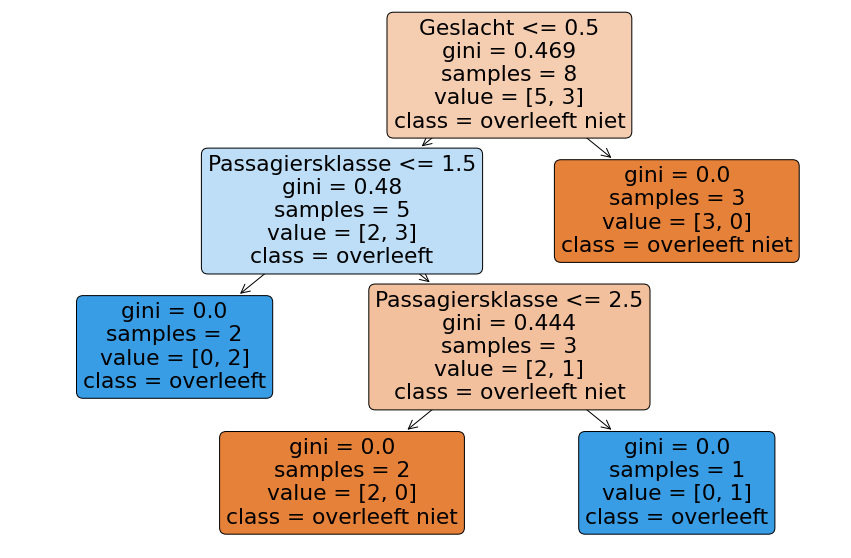

In [7]:
plt.figure(figsize=(15,10))  
tree.plot_tree(beslissingsboom, 
               class_names=["overleeft niet", "overleeft"], 
               feature_names=["Passagiersklasse", "Geslacht" ,"Familie", "Dek"], 
               filled=True, rounded=True)
plt.show()

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Zorg, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 